In [2]:
using MAT
using Plots
pyplot()

Plots.PyPlotBackend()

In [32]:
filename = "../../Data/Mouse/Spike2/10-4-10.mat"
rawdata = matread(filename)

markers = rawdata["Memory"]["times"][:]
channel = rawdata["untitled"]["values"][:]
tspec = rawdata["untitled"]["times"][:]
fs = 1 / rawdata["untitled"]["interval"]
entrain_markers = markers[end] + [10, 20]

roi = -2*fs:5*fs-1
epoch = zeros(Float32, (size(markers, 1)-1, size(roi, 1)))
for (midx, mark) in enumerate(markers[2:end])
    irange = roi + mark * fs .|> floor
    epoch[midx, :] = channel[Int.(irange)]
end
length(channel) / fs - markers[end]

19.763280000000066

In [33]:
#export
matwrite("../../Data/Mouse/Compact/mouse-10-4-10.mat", Dict([
            "markers" => markers[2:end],
            "entrain_markers" => entrain_markers,
            "channel" => channel,
            "tspec"   => tspec,
            "fs"      => fs,
            "epoch"   => epoch
    ]))

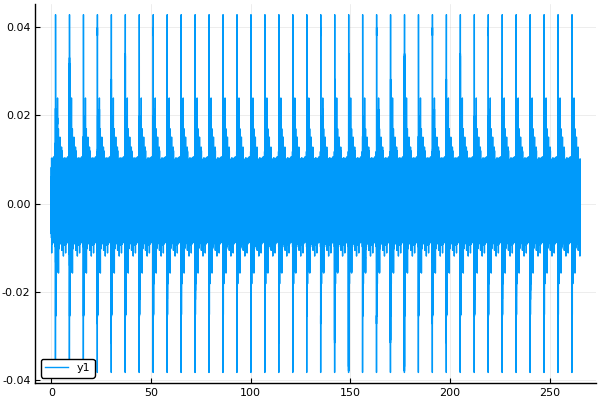

In [9]:
@time erp = mean(epoch, 1)[:];
plot(tspec, erp)

In [34]:
?conv

search: conv conv2 convert deconv ConjVector code_native @code_native conj cond



```
conv(u,v)
```

Convolution of two vectors. Uses FFT algorithm.


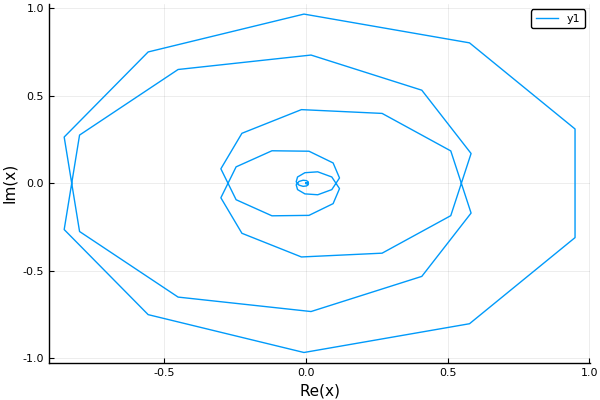

In [36]:
function morlet(F::T, fs) where {T<:Number}
    s = 6 / (2 * pi * F)
    wtime = linspace(-1,1,2*fs)
    wavelet = exp.(2*pi*wtime*F*1im) .* exp.(- wtime.^2/(2*s^2))  # morlet wavelet
    return wavelet
end
plot(morlet(10, 100))